# Stage E Hamoye Internship- PRACTICAL TIME SERIES ANALYSIS & FORECAST

### Name: Peter Wainaina
### Student ID: 16cc46827641f000  

#### Question 1
Which of the following best describes stationarity?

**Answer:** The standard deviation and the mean does not change over time.

#### Question 2
In The augmented Dickey-Fuller unit root test, a P value of < 0.05 suggests that ___

**Answer:** The time series is stationary

#### Question 3
The Log differencing data transformation technique is used to remove __ & __ from a time series Data

**Answer:** Trend & Seasonality

#### Question 4
Which time series forecasting model involves the linear combination of past time series values of the target variable to predict future values?

**Answer:** 
Moving Average Model

#### Question 5
Which of these is a method employed in performing a train test split on a time series dataset?

**Answer:** Sliding Window

#### Question 6
In the Arima time series forecasting model, the parameters ‘pdq’ represents____?

**Answer:** Number of past time steps, Number of non-seasonal Differences, Past Errors/REsiduals

#### Question 7
Which of these imputation methods is not suitable for a time series data that is to be used for modeling?

**Answer:** Filling with a very large integer value

#### Question 8
Which of these is not a behaviour exhibited by a time series data

**Answer:** Linearity

#### Question 9
The time series model of order ___ states that the current time series value is linearly dependent on the past p values with some white noise?

**Answer:** AR, order p

#### Question 10
The ___ model of order ___ says that the time series is linearly dependent on current and past shock values or noise?

**Answer:** 

ARIMA model, order pdq.

AR model, order p

MA model, order q

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt   

from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from prophet import Prophet
%matplotlib inline

In [2]:
df = pd.read_csv("Time_series_analysis_and_forecast_DATASET.csv")
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
df.shape

(92016, 5)

In [4]:
df.dtypes

FullDate      object
Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [5]:
df.isna().any()

FullDate     False
Tmax         False
SysLoad      False
GasPrice     False
ElecPrice    False
dtype: bool

In [6]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


Conveting the **"FullDate"** column to date-time,
Renaming the **"FullDate"** column to **"ds"**,
Renaming the **"ElecPrice"** column to **"y"**

In [7]:
df['FullDate'] = pd.to_datetime(df.FullDate)
df = df.rename(columns={"FullDate" : "ds" , "ElecPrice" : "y" }) 
df.set_index('ds', inplace=True)
df.head(10)

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030
2010-09-01 05:00:00,15.8,1232.000,3.69,19.160
2010-09-01 06:00:00,15.8,1282.930,3.69,23.540
2010-09-01 07:00:00,15.8,1430.935,3.69,26.235
2010-09-01 08:00:00,15.8,1670.275,3.69,28.690


In [8]:
#copy of the dataframe
df_copy = df.copy()

In [9]:
df_daily = df_copy.resample('D').sum()
print(df_daily.shape)
df_daily.head()

(3834, 4)


,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


#### Question 11
Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

**Answer:** As seen in the diagram and working below:

Text(0, 0.5, 'ElecPrice')

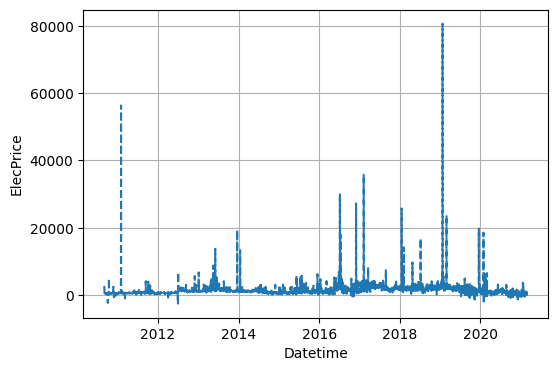

In [10]:
plt.figure(figsize=(6,4))
plt.plot(df_daily.index, df_daily.y, '--')
plt.grid()
plt.xlabel('Datetime')
plt.ylabel('ElecPrice')

#### Question 12
Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

**Answer:** 
0.004254, 0.045027,
As seen in the working below:

In [11]:
# P value of Sysload using Augmented Dicky Fuller test (ADF)
sysload_adf = adfuller(df_daily['SysLoad'])
print(f'SysLoad: {round(sysload_adf[1],6)}')

SysLoad: 0.004254


In [12]:
# P value of GasPrice using Augmented Dicky Fuller test (ADF)
gasprice_adf = adfuller(df_daily['GasPrice'])
print(f'GasPrice: {round(gasprice_adf[1],6)}')

GasPrice: 0.045027


#### Question 13
Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

**Answer:** 
-2.5672, -2.8623,
As seen in the diagram and working below:

In [13]:
adf_gasprice = adfuller(df_daily['GasPrice'])
print(f'ADF: {round(adf_gasprice[0],4)}')
print('The Critical Values of GasPrice and ElecPrice:')
for k, v in adf_gasprice[4].items():
  print(f'   {k}: {round(v, 4)}')

ADF: -2.9028
The Critical Values of GasPrice and ElecPrice:
   1%: -3.4321
   5%: -2.8623
   10%: -2.5672


In [14]:
df_daily.reset_index(inplace=True)

traindf = df_daily.iloc[:2757,:]
testdf = df_daily.iloc[2757:,:]

In [15]:
def mape(y, yhat):
  y = y.reset_index(drop=True)
  return round(np.mean(np.abs((y - yhat)/y)*100),2)

#### Question 14

Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

Hint:

Define a function that calculates the Mape using the definition of MAPE from the course Module and pass your dataset into it.

**Answer:** 544.09,  As seen in the working and answer below: 

In [16]:
model_1 = Prophet()
model_1.fit(traindf)

17:58:45 - cmdstanpy - INFO - Chain [1] start processing
17:58:45 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
pred1 = model_1.predict(testdf) 
mape(testdf['y'],pred1['yhat'])

544.09

#### Question 15
What is the RMSE in 2 decimal places?

**Answer:** 
3207.46, As seen in the working and answer below:

In [18]:
rmse = np.sqrt(metrics.mean_squared_error(np.array(testdf['y']),np.array(pred1['yhat'])))

print('The RMSE is : %s' %(round(rmse,2)))

The RMSE is : 3207.46


#### Question 16

If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

**Answer:** July

In [19]:
new_df = df_daily.rename(columns={"SysLoad" : "add1" , "Tmax" : "add2", "GasPrice" : "add3" })

traindf2 = new_df[:2757]
testdf2 = new_df[2757:]

In [20]:
model2 = Prophet()

model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

In [21]:
model2.fit(traindf2)

17:58:46 - cmdstanpy - INFO - Chain [1] start processing
17:58:46 - cmdstanpy - INFO - Chain [1] done processing


#### Question 17

Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

**Answer:** 237.34, As seen in the working and answer below: 

In [22]:
pred2 = model2.predict(testdf2) 
mape(testdf['y'],pred2['yhat'])

237.34

#### Question 18
What is the RMSE in 2 decimal places?

**Answer:** 2713.53, As seen in the working below:

In [23]:
rmse2 = np.sqrt(metrics.mean_squared_error(np.array(testdf['y']),np.array(pred2['yhat'])))

print('The RMSE is : %s' %(round(rmse2,2)))

The RMSE is : 2713.53


#### Question 19

If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?

**Answer:** Thursday, As seen in the working for number 16:

#### Question 20

Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),

What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?

**Answer:** 231.58, As seen in the working below: 

In [24]:
traindf3 = new_df.iloc[:2757,:]
testdf3 = new_df.iloc[2757:,:]

mv_df2 = df_daily.rename(columns={"SysLoad" : "add1" , "Tmax" : "add2", "GasPrice" : "add3" })
mv_df2.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [25]:
mv_df2= mv_df2.drop(["add2"], axis=1)

In [26]:
traindf2 = mv_df2.iloc[:2757,:]
testdf2 = mv_df2.iloc[2757:,:]

In [27]:
model_3 = Prophet()
model_3.add_regressor("add1")
model_3.add_regressor("add3")
model_3.fit(traindf2)

17:58:47 - cmdstanpy - INFO - Chain [1] start processing
17:58:47 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
pred3 = model_3.predict(testdf2)

mape(testdf['y'],pred3['yhat'])

231.58